In [ ]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import (
    StringLookup, TextVectorization)

tf.random.set_seed(1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [ ]:
data.head()

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [ ]:
data.shape

(53845, 18)

In [ ]:
data.City.unique()

array(['Goleta', 'Santa Barbara', 'Carpinteria', 'Montecito',
       'Isla Vista', 'Santa Barbara ', 'Truckee', 'Summerland',
       'Port Hueneme', 'West Hill', 'Los Angeles', 'Mission Canyon',
       'Sparks', 'Kings Beach', 'Cerritos', 'Santa Clara', 'Reno',
       'Real Goleta', 'Aliso Viejo', 'Santa Barbara & Ventura Counties',
       'South Lake Tahoe', 'Santa Barbra', 'Santa  Barbara', 'Salinas',
       'Santa Maria'], dtype=object)

## Data Processing


In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
import re
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops.add("'s")
stops.remove("not")


def clean(sentence):
    # delete stopwords
    temp = " ".join(filter(lambda x: x not in stops, sentence.split()))
    # Remove punctuation
    temp = temp.translate(str.maketrans('', '', punctuation))
    # remove non-english characters
    temp = temp.encode("ascii", "ignore").decode()
    # Change all to lower case
    temp = temp.lower()
    # Delete numbers
    temp = re.sub(r'[0-9]', "", temp)
    # Delete excessive spaces and return
    return re.sub("  ", " ", temp)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["Review"] = data.Review.apply(clean)

In [ ]:
data.head()

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,great burgersfries salad burgers hint salt pep...,CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,we bit weary trying shellfish company wharf of...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,this tough one on merits wine fairly average i...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,i love trying fresh seafood piers wharfs seasi...,CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,i stopped i hungry snacks browsed store since ...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data.Review), np.array(data.Star), test_size=0.3, random_state=8)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(np.array(data.Review), np.array(data.Star), test_size=0.3, random_state=8)


In [ ]:
X_test_

array(['The food Buddha Bowls is... unreal.\n\nIt\'s everything you crave in one place: the gooey cheese, the fried egg, the meats, all in a warm bread bowl. I went here with my family, so it probably wasn\'t as enjoyable compared to it being drunk food, but it was still pretty tasty.\n\nWe got the Hangover bowl and the Hawaiian bowl, which were both good. I\'m not a huge fan of this sort of food and we usually don\'t eat, but the BREAD. Omg. It was the best part of the whole thing. It was so crispy and that pesto though. (crying emoji)\n\nThe contents of the bowl seemed overwhelming. It\'s literally a bowl of cheese and meats topped with an egg. The three of us got two bowls but could\'ve probably shared just one. I had a sample of the chili before and it had just the right amount of spice. Also I know the mac\'n\'cheese is a popular choice! I\'ll get those two next time.\n\nThe food was 4 stars but the service was incredible! I got an extra stamp "just \'cause." Everyone was so helpf

In [ ]:
X_test

array(['the food buddha bowls is unreal its everything crave one place gooey cheese fried egg meats warm bread bowl i went family probably enjoyable compared drunk food still pretty tasty we got hangover bowl hawaiian bowl good im not huge fan sort food usually eat bread omg it best part whole thing it crispy pesto though crying emoji the contents bowl seemed overwhelming its literally bowl cheese meats topped egg the three us got two bowls couldve probably shared one i sample chili right amount spice also i know macncheese popular choice ill get two next time the food stars service incredible i got extra stamp just cause everyone helpful knowing first time here recommendations helping us process i know served waited bring bowls tables whole time lol the vibe friendly i love it you guys rock',
       'ok review reflects latest visit my previous visits echo everyones elses complaints long takes wait food this time i decided take avoid wait i ordered drunken noodles waiter phone said itl

# Modeling

## Baseline Model
In this model, we use the mean star of the training set to use as the prediction, regardless of the review text. In this way, we can create a baseline model on which further more complex model can improve on.

In [ ]:
y_hat = y_train.mean()

In [ ]:
y_hat

4.008039054416174

In [ ]:
r2_score(y_test, [y_hat] * len(y_test))

-3.435187043443477e-05

In [ ]:
mean_squared_error(y_test, [y_hat] * len(y_test))

1.134924954168833

## TF-IDF + Linear Regression with CV

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
m_lr = LinearRegression()
# params = {"knn__n_neighbors": [1, 3, 5, 7, 12, 15, 20]}
# grids = GridSearchCV(m_lr, params, cv=5)
# grids.fit(X_train, y_train)

In [ ]:
m_lr.fit(X_train_tfidf, y_train)

KeyboardInterrupt: ignored

In [ ]:
y_hat = m_lr.predict(X_test_tfidf)

In [ ]:
r2_score(y_test, y_hat)

In [ ]:
mean_squared_error(y_test, y_hat)

In [ ]:
y_hat.mean()

## Bidirectional RNN-LSTM

In [ ]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train - 1))
test_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test - 1))


In [ ]:
train_tf = train_tf.batch(8)
test_tf = test_tf.batch(8)

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=2500,
    output_mode="tf-idf")

In [ ]:
text_vectorization.adapt(X_train)

In [ ]:
binary_2gram_train_ds = train_tf.map( 
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4) 

binary_2gram_test_ds = test_tf.map( 
    lambda x, y: (text_vectorization(x), y), 
    num_parallel_calls=4) 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
def get_model(max_tokens=2500, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,), name="input_vectorized_text")
    x = layers.Dense(hidden_dim, name="hidden_layer", activation="relu")(inputs)
    x = layers.Dropout(0.3, name="dropout")(x)
    outputs = layers.Dense(5, activation="sigmoid", name="classifier")(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
    return model

In [ ]:
import tensorflow_addons as tfa

In [ ]:
model = get_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_vectorized_text (Inpu  [(None, 2500)]           0         
 tLayer)                                                         
                                                                 
 hidden_layer (Dense)        (None, 16)                40016     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 classifier (Dense)          (None, 5)                 85        
                                                                 
Total params: 40,101
Trainable params: 40,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for d, t in binary_2gram_train_ds:
    print(d.shape)
    print(t.shape)
    print(t)
    break

(8, 2500)
(8,)
tf.Tensor([3. 1. 3. 3. 4. 3. 4. 4.], shape=(8,), dtype=float64)


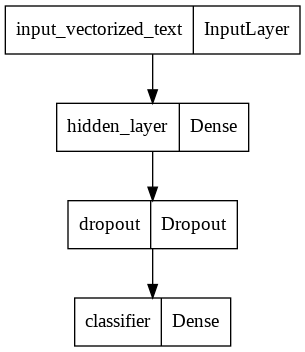

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(), 
    validation_data=binary_2gram_test_ds.cache(), 
    epochs=20,
    callbacks=callbacks)

Epoch 1/20
4712/4712 [==============================] - 18s 3ms/step - loss: 1.2653 - accuracy: 0.4547 - val_loss: 1.0285 - val_accuracy: 0.5318
Epoch 2/20
4712/4712 [==============================] - 14s 3ms/step - loss: 1.0772 - accuracy: 0.4963 - val_loss: 1.0164 - val_accuracy: 0.5399
Epoch 3/20
4712/4712 [==============================] - 14s 3ms/step - loss: 1.0460 - accuracy: 0.5151 - val_loss: 1.0163 - val_accuracy: 0.5363
Epoch 4/20
4712/4712 [==============================] - 14s 3ms/step - loss: 1.0174 - accuracy: 0.5263 - val_loss: 1.0206 - val_accuracy: 0.5425
Epoch 5/20
4712/4712 [==============================] - 14s 3ms/step - loss: 1.0015 - accuracy: 0.5339 - val_loss: 1.0193 - val_accuracy: 0.5445
Epoch 6/20
4712/4712 [==============================] - 14s 3ms/step - loss: 0.9855 - accuracy: 0.5426 - val_loss: 1.0454 - val_accuracy: 0.5455
Epoch 7/20
4712/4712 [==============================] - 14s 3ms/step - loss: 0.9752 - accuracy: 0.5451 - val_loss: 1.0577 - val_ac

In [ ]:
res_1 = model.predict(binary_2gram_test_ds)
res_1 = np.apply_along_axis(np.argmax, 1, res_1)

2020/2020 [==============================] - 3s 1ms/step


In [ ]:
y_test

array([5., 2., 4., ..., 4., 5., 5.])

In [ ]:
((res_1+1) == y_test).mean()

0.5457471833601585

In [ ]:
r2_score(y_test, (res_1+1))

0.3871689355343557

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, (res_1+1), average="macro")

0.4337435661474062

## BERT

In [ ]:
!pip install tensorflow_text tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.9 MB/s 
     |████████████████████████████████| 2.4 MB 62.1 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 439 kB 60.3 MB/s 
     |████████████████████████████████| 1.7 MB 87.7 MB/s 
     |████████████████████████████████| 6.0 MB 78.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 73.9 MB/s 
     |████████████████████████████████| 238 kB 80.9 MB/s 
     |████████████████████████████████| 1.3 MB 83.5 MB/s 
     |████████████████████████████████| 2.3 MB 86.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 118 kB 93.4 MB/s 
     |████████████████████████████████| 352 kB 95.1 MB/s 
     |████████████████████████████████| 662 kB 89.7 MB/s 
  Created wheel for seqeval: filen

In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
from official.nlp import optimization
tf.get_logger().setLevel('ERROR')

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
def build_reg_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1, name="dropout")(net)
  net = tf.keras.layers.Dense(5, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model2 = build_reg_model()

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text_input[0][0]']             
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

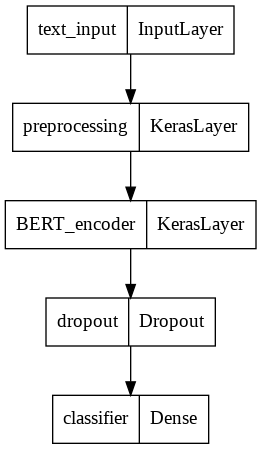

In [ ]:
tf.keras.utils.plot_model(model2)

In [ ]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_tf).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
model2.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
history2 = model2.fit(x=train_tf,
                               validation_data=test_tf,
                               epochs=epochs)

Epoch 1/5
4712/4712 [==============================] - 157s 31ms/step - loss: 1.0834 - accuracy: 0.5116 - val_loss: 0.9431 - val_accuracy: 0.5752
Epoch 2/5
4712/4712 [==============================] - 146s 31ms/step - loss: 0.8879 - accuracy: 0.6036 - val_loss: 0.9421 - val_accuracy: 0.5952
Epoch 3/5
4712/4712 [==============================] - 146s 31ms/step - loss: 0.7616 - accuracy: 0.6755 - val_loss: 1.0556 - val_accuracy: 0.5924
Epoch 4/5
4712/4712 [==============================] - 146s 31ms/step - loss: 0.6531 - accuracy: 0.7313 - val_loss: 1.1186 - val_accuracy: 0.5892
Epoch 5/5
4712/4712 [==============================] - 145s 31ms/step - loss: 0.5721 - accuracy: 0.7727 - val_loss: 1.1865 - val_accuracy: 0.5914


In [ ]:
res = model2.predict(test_tf)

2020/2020 [==============================] - 25s 12ms/step


In [ ]:
res_index = np.apply_along_axis(np.argmax, 1, res) + 1

In [ ]:
y_test

array([5., 2., 4., ..., 4., 5., 5.])

In [ ]:
r2_score(y_test, res_index)

0.4923893292463475

In [ ]:
(y_test == res_index).mean()

0.5914324625479758

In [ ]:
f1_score(y_test, res_index, average="macro")

NameError: ignored

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
len(y_test)

16154

In [ ]:
y_test

array([5., 2., 4., ..., 4., 5., 5.])

In [ ]:
from collections import Counter

In [ ]:
cnt = Counter(y_test)

In [ ]:
cnt

Counter({5.0: 6400, 2.0: 1074, 4.0: 5595, 1.0: 569, 3.0: 2516})

In [ ]:
tem = multilabel_confusion_matrix(y_test, res_index, labels =[1.,2.,3.,4.,5.],samplewise=False)
tem = tem[:,1, 1]

In [ ]:
tem

array([ 296,  438, 1230, 3258, 4332])

In [ ]:
len(np.where((y_test - res_index) == -4)[0])

6

In [ ]:
X_train.shape

(37691,)

In [ ]:
y_test[13031]

1.0

In [ ]:
res_index[13031]

5

In [ ]:
X_test_[13031]

'My last review I gave them one star.  I really called them a two star restaurant but knocked off one star for all their fake Yelp reviews.   But now I can shout to the world that they earned their one star on their own merit!   Jacking up the prices in their drinks during World Cup!   Shame on you Sharkeez!  $7.25 for a Corona?   \n\nCongratulations Sharkeez.  You never fail at failing.'

In [ ]:
for i in range(5):
    print(tem[i] / cnt[i+1])

0.5202108963093146
0.40782122905027934
0.4888712241653418
0.5823056300268097
0.676875
